In [1]:
%matplotlib inline

# Pyplot 
---

# Содержание

* [Введение в pyplot](#Введение-в-pyplot)

* [Форматирование стиля plot](#Форматирование-стиля-plot)

* [График с использованием данных с ключами](#График-с-использованием-данных-с-ключами)

* [График с категориальными переменными](#График-с-категориальными-переменными)

* [Свойства линии](#Свойства-линии)

* [Работа с несколькими фигурами и осями](#Работа-с-несколькими-фигурами-и-осями)

* [Работа с текстом](#Работа-с-текстом)
    * [Текст-аннотация](#Текст-аннотация)
    
* [Логарифмические и другие нелинейные шкалы](#Логарифмические-и-другие-нелинейные-шкалы)

## Введение в pyplot
---

[matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) - это набор функций, которые позволяют matplotlib работать как MATLAB. Каждая функция pyplot вносит некоторые изменения в фигуру: например, создает фигуру, создает область построения на фигуре, строит некоторые линии в области построения, украшает график метками и т. д.

В [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) различные состояния сохраняются при вызовах функций, так что он отслеживает такие вещи, как текущая фигура и область построения, а функции построения воздействуют на текущие оси (обратите внимание, что «оси» здесь и в большинстве мест в документация относится к части фигуры Axes, а не к строгому математическому термину для более чем одной оси).

---

С помощью pyplot легко построить график:

In [3]:
import matplotlib.pyplot as plt

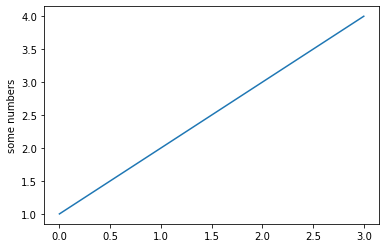

In [4]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

---
Вам может быть интересно, почему ось X находится в диапазоне от 0 до 3, а ось Y - от 1 до 4. Если вы предоставляете один список или массив для построения графика, matplotlib предполагает, что это последовательность значений y, и автоматически генерирует значения x за вас. Поскольку диапазоны Python начинаются с 0, вектор x по умолчанию имеет ту же длину, что и y, но начинается с 0. Следовательно, данные x равны [0, 1, 2, 3].

---

[plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot) - это универсальная функция, которая принимает произвольное количество аргументов.  
Например, чтобы построить график зависимости x от y, вы можете написать:  

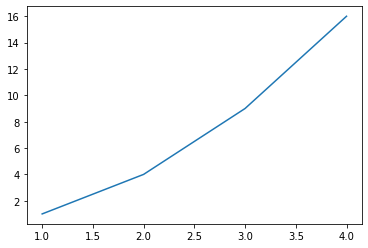

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

---
## Форматирование стиля plot
---

Для каждой пары аргументов x, y существует необязательный третий аргумент, который представляет собой строку формата, которая указывает цвет и тип линии графика. Буквы и символы строки формата взяты из MATLAB, можно объединять строку цвета со строкой стиля линии. Строка формата по умолчанию - «b-», которая представляет собой сплошную синюю линию.  
Например, можно отобразить пример выше с красными кружками:

In [2]:
import matplotlib.pyplot as plt

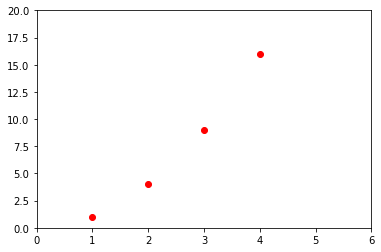

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

---
См. полный список стилей линий и форматных строк в документации к [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot). Функция [axis](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib-pyplot-axis) в приведенном выше примере принимает список [xmin, xmax, ymin, ymax] и указывает область отображения осей.

---

Если бы matplotlib был ограничен работой со списками, он был бы бесполезен для обработки чисел. Как правило, вы будете использовать массивы numpy. Фактически, все последовательности внутренне преобразуются в массивы numpy. В приведенном ниже примере показано построение нескольких строк с разными стилями формата в одном вызове функции с использованием массивов.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

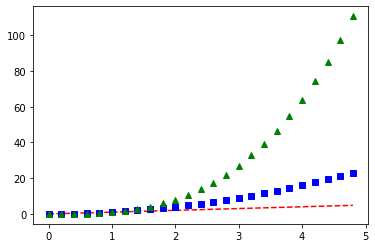

In [5]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

---
## График с использованием данных с ключами
---

В некоторых случаях у вас есть данные в формате, который позволяет обращаться к определенным переменным с помощью строк. Например, [numpy.recarray](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy-recarray) или [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame).

Matplotlib позволяет вам изобразить такой объект, передавая его в именованный аргумент data. Если предусмотрено, вы можете создавать графики со строками, соответствующими этим переменным.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

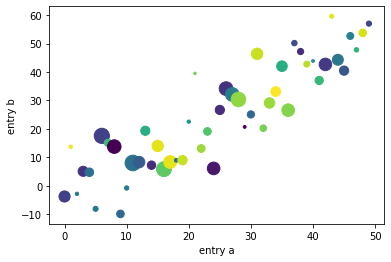

In [7]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

---
## График с категориальными переменными
---

Также возможно построить график с использованием категориальных переменных. Matplotlib позволяет передавать категориальные переменные напрямую во многие функции построения графиков.

In [8]:
import matplotlib.pyplot as plt

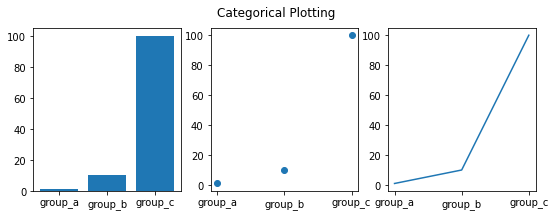

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

---
## Свойства линии
---

У линий есть множество атрибутов, которые вы можете установить: ширина линии, стиль тире, сглаживание и т. д .; см. [matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib-lines-line2d). Есть несколько способов задать свойства линии.

* Используя именованные аргументы:

      plt.plot(x, y, linewidth=2.0)


* Используя setter экзепмляра объекта Line2D.  plot возвращает список объектов Line2D; т.е., line1, line2 = plot(x1, y1, x2, y2).  В коде ниже полагаем, что у нас есть только 1 линия. Используем распаковку тортежей чтобы получить 1 элемент:

      line, = plt.plot(x, y, '-')
      line.set_antialiased(False) # turn off antialiasing

* Используя [pyplot.setp](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html#matplotlib-pyplot-setp). 

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

---
Все свойства Line2D:  
![](https://raw.githubusercontent.com/letimofeev/python_course/main/matplotlib/translated/images/line_properties.png)

---

## Работа с несколькими фигурами и осями
---

MATLAB и [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) имеют концепцию текущей фигуры и текущих осей. Все функции построения графика применяются к текущим осям. Функция [gca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib-pyplot-gca) возвращает текущие оси (экземпляр [matplotlib.axes.Axes](https://matplotlib.org/stable/api/axes_api.html#the-axes-class)), а [gcf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf) возвращает текущую фигуру (экземпляр [matplotlib.figure.Figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure)).  
Ниже приведен пример создания двух подграфиков.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

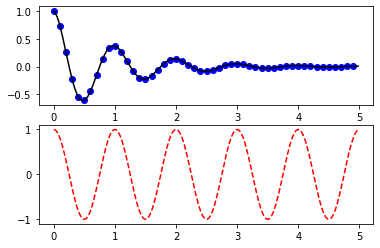

In [21]:
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()   # The figure call here is optional because a figure will be created if none exists
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

---
>В вызове subplot обязательными аргументами являются numrows, numcols, plot_number, где plot_number находится в диапазоне от 1 до numrows * numcols. Запятые в вызове подзаголовка необязательны, если numrows * numcols < 10. Таким образом, вызов subplot(211) идентичен subplot(2, 1, 1).

---

Вы можете создать произвольное количество дополнительных графиков и осей. Если вы хотите разместить оси вручную, т. е. не в прямоугольной сетке, используйте оси, которые позволяют указать местоположение в виде осей ([left, bottom, width, height]), где все значения даны в дробном порядке (от 0 до 1 ) координаты. (см. пример ниже)

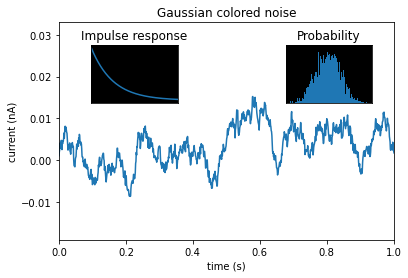

In [22]:
np.random.seed(19680801)  # Fixing random state for reproducibility.

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, .2), xticks=[], yticks=[])

plt.show()

---
Вы можете создать несколько фигур, используя несколько вызовов [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure) с увеличивающимся номером фигуры.

<ipython-input-3-794d8f674c41>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)             # make subplot(211) in figure1 current


Text(0.5, 1.0, 'Easy as 1, 2, 3')

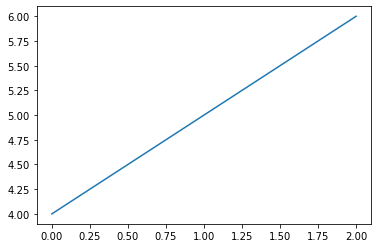

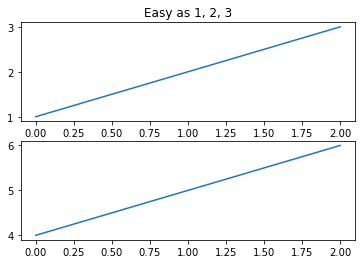

In [3]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

---
## Работа с текстом
---

[text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib-pyplot-text) может использоваться для добавления текста в произвольном месте, а [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib-pyplot-xlabel), [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib-pyplot-ylabel) и [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib-pyplot-title) используются для добавления текста в заданных местах

In [4]:
import matplotlib.pyplot as plt
import numpy as np

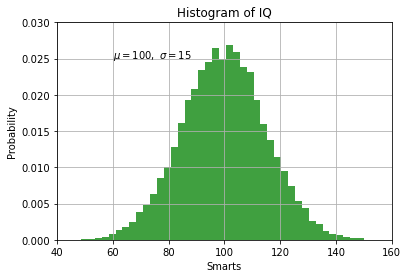

In [5]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

---
Все текстовые функции возвращают экземпляр [matplotlib.text.Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text). Вы можете настроить свойства, передав значения в именные аргументы текстовой функции или используя setp:

    t = plt.xlabel('my data', fontsize=14, color='red')
    
Все свойства text:  
![](https://raw.githubusercontent.com/letimofeev/python_course/main/matplotlib/translated/images/text_properties.png)

---

### Текст-аннотация

Использование функции [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib-pyplot-text) помещает текст в произвольную позицию на осях. Обычно текст используется для аннотирования некоторых функций графика, а метод [annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib-pyplot-annotate) предоставляет вспомогательные функции, упрощающие аннотации. В аннотации необходимо учитывать два момента: аннотируемое местоположение, представленное аргументом xy, и местоположение текста xytext. Оба этих аргумента являются кортежами (x, y).

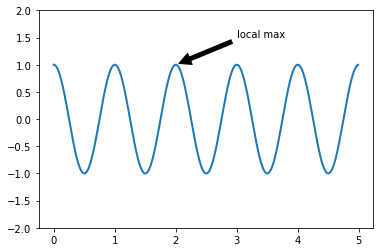

In [6]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

---
## Логарифмические и другие нелинейные шкалы 
---

[matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) поддерживает не только линейные шкалы осей, но также логарифмические и логитовые шкалы. Это обычно используется, если данные охватывают много порядков. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

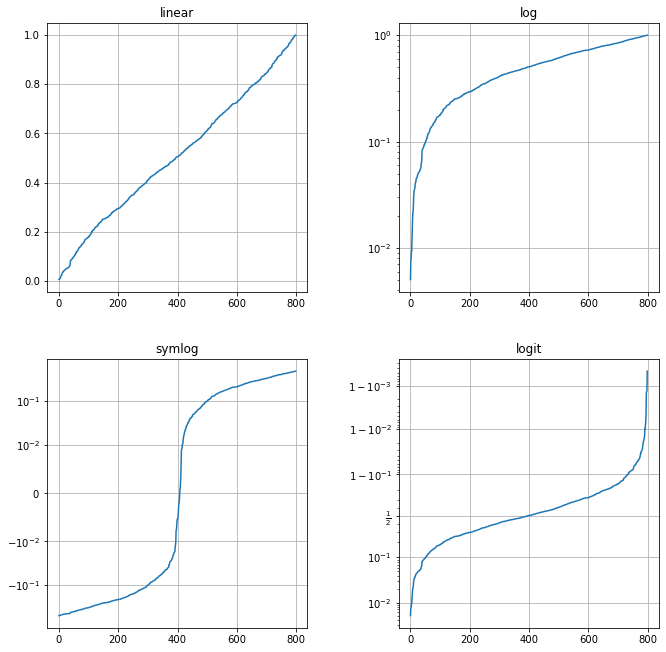

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(10, 10))


# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()